In [1]:
import pyaudio
import wave
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.io.wavfile
from scipy.signal import correlate
from IPython.display import Audio
from audio import *
import sounddevice as sd
%matplotlib inline

In [2]:
#generating white noise signal 
fs = 44100
T = 10

transmitted_noise = np.random.normal(0,5000,fs * T)
scipy.io.wavfile.write(r"noise.wav", fs, transmitted_noise.astype(np.int16))

In [3]:
received_noise = sd.playrec(transmitted_noise.astype(np.int16), samplerate= fs, channels=1)
sd.wait()

numpy.ndarray

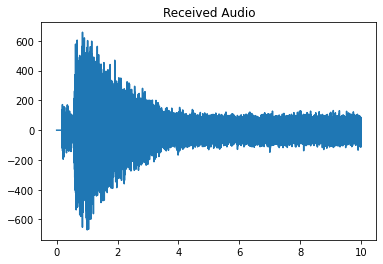

In [5]:
time = np.linspace(0, T, len(received_noise))

plt.title('Received Audio')
plt.plot(time,received_noise)
type(received_noise)

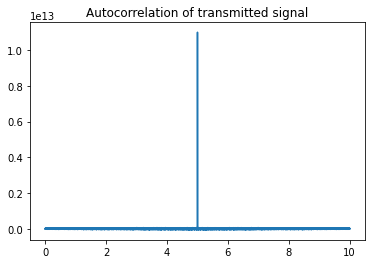

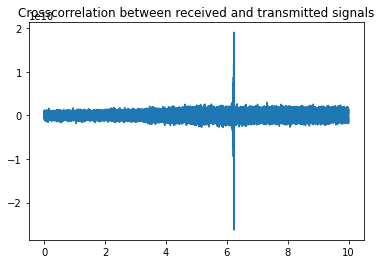

440320 440320


In [133]:
#define auto and cross correlations
transmitted_noise = transmitted_noise[:len(received_noise)]

ac= scipy.signal.correlate(transmitted_noise, transmitted_noise, mode='same', method='auto')
cc= scipy.signal.correlate(transmitted_noise, received_noise, mode='same', method='auto')


time = np.linspace(0, T, num= len(ac))



plt.title('Autocorrelation of transmitted signal')
plt.plot(time, ac)
plt.show()

plt.title('Crosscorrelation between received and transmitted signals')
plt.plot(time, cc)
plt.show()

print(len(cc) , len(ac))

220160
220160


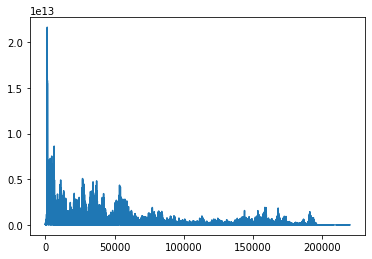

In [134]:
#taking dft

dft_ac= np.fft.fft(ac, n=None, axis=-1, norm=None)
dft_cc= np.fft.fft(cc, n=None, axis=-1, norm=None)



dft_ac = dft_ac[:int(len(dft_ac)/2)]
dft_cc = dft_cc[:int(len(dft_cc)/2)]
print(len(dft_cc))
print(len(dft_ac))

freq = np.linspace(0,len(dft_cc),len(dft_cc))
plt.plot(freq,abs(dft_cc))

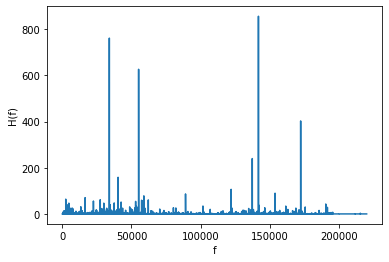

In [135]:
#finding psd

H = np.zeros_like(dft_cc)

for i in range(len(dft_cc)):
    H[i] = dft_cc[i] / dft_ac[i]
    
impulse_response = np.fft.ifft(H, n=None, axis=-1, norm=None)
time = np.linspace(0,len(impulse_response), len(impulse_response))

freq = np.linspace(0,len(H),len(H))

plt.figure(1)
plt.plot(freq, abs(H))
plt.ylabel('H(f)')
plt.xlabel('f')
plt.savefig('H(f)')
plt.show()

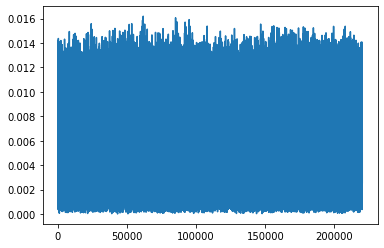

In [136]:
plt.figure(2)
plt.plot(time, abs(impulse_response))
plt.savefig('Channel Impulse Response')
plt.show()